In [93]:
from typing import Any, Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
objectives = ["mml_zscore", "pg_basic", "pg_zscore", "mml_basic"]
policies = ["off_policy", "on_policy"]
sampling_algorithms = ["mixed", "top_p", "beam_search"]
seeds = ["12321", "11", "42", "2023", "1993"]


def cum_mean(arr: Any) -> Any:
    """Helper function."""
    cum_sum = np.cumsum(arr, axis=0)
    for i in range(cum_sum.shape[0]):
        if i == 0:
            continue
        # print(cum_sum[i] / (i + 1))
        cum_sum[i] = cum_sum[i] / (i + 1)
    return cum_sum


experiment_results: Dict[str, List[np.array]] = {}
experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        for sample_alg in sampling_algorithms:
            experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                path = "../predictions-oct-8"
                file = f"{path}/sst2_2_128_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy_0.7.csv"
                if pol == "ppo":
                    file = file.replace("0.6", "0.7")
                try:
                    df = pd.read_csv(file)
                    step_arr = df["Step"].tolist()
                    performance_arr = df["Value"].tolist()
                    experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(np.array(step_arr[:148]))
                    experiment_results[f"{obj}_{pol}_{sample_alg}"].append(np.array(performance_arr[:148]))
                except Exception as e:
                    print("not found", e)
                    continue


def experiment_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    select_indices = [x for x in range(len(experiment_steps[experiment_name][0])) if x % 1 == 0]
    x = np.array(experiment_steps[experiment_name][0][select_indices])
    y = np.array(experiment_results[experiment_name]) * 100.00
    print(experiment_name, x.shape, y.shape)

    mean_y = np.mean(y, axis=0)[select_indices]
    std_y = np.std(y, axis=0)[select_indices]
    # return x, y, cum_mean(mean_y), std_y
    return x, y, mean_y, std_y


experiment_means = {exp_name: experiment_to_numpy(exp_name)[2] for exp_name in experiment_results.keys()}
experiment_stds = {exp_name: experiment_to_numpy(exp_name)[3] for exp_name in experiment_results.keys()}
experiment_steps = {exp_name: experiment_to_numpy(exp_name)[0] for exp_name in experiment_results.keys()}

mml_zscore_off_policy_mixed (148,) (5, 148)
mml_zscore_off_policy_top_p (148,) (5, 148)
mml_zscore_off_policy_beam_search (148,) (5, 148)
mml_zscore_on_policy_mixed (148,) (5, 148)
mml_zscore_on_policy_top_p (148,) (5, 148)
mml_zscore_on_policy_beam_search (148,) (5, 148)
pg_basic_off_policy_mixed (148,) (5, 148)
pg_basic_off_policy_top_p (148,) (5, 148)
pg_basic_off_policy_beam_search (148,) (5, 148)
pg_basic_on_policy_mixed (148,) (5, 148)
pg_basic_on_policy_top_p (148,) (5, 148)
pg_basic_on_policy_beam_search (148,) (5, 148)
pg_zscore_off_policy_mixed (148,) (5, 148)
pg_zscore_off_policy_top_p (148,) (5, 148)
pg_zscore_off_policy_beam_search (148,) (5, 148)
pg_zscore_on_policy_mixed (148,) (5, 148)
pg_zscore_on_policy_top_p (148,) (5, 148)
pg_zscore_on_policy_beam_search (148,) (5, 148)
mml_basic_off_policy_mixed (148,) (5, 148)
mml_basic_off_policy_top_p (148,) (5, 148)
mml_basic_off_policy_beam_search (148,) (5, 148)
mml_basic_on_policy_mixed (148,) (5, 148)
mml_basic_on_policy_to

In [127]:
objectives = ["pg_basic", "mml_basic"]
policies = ["ppo"]
sampling_algorithms = ["top_p", "beam_search"]
seeds = ["12321", "11", "1993", "42", "2023"]

ppo_experiment_results: Dict[str, List[np.array]] = {}
ppo_experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        for sample_alg in sampling_algorithms:
            if obj == "pg_basic":
                sample_alg = "top_p"
            elif obj == "mml_basic":
                sample_alg = "beam_search"
            ppo_experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            ppo_experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                path = "ablation-results-july-24"
                file = f"{path}/sst2_2_128_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy_0.6.csv"
                if pol == "ppo":
                    file = file.replace("0.6", "0.7")
                try:
                    df = pd.read_csv(file)
                    step_arr = df["Step"].tolist()
                    performance_arr = df["Value"].tolist()
                    ppo_experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(np.array(step_arr[:95]))
                    ppo_experiment_results[f"{obj}_{pol}_{sample_alg}"].append(np.array(performance_arr[:95]))
                except Exception as e:
                    print("not found", e)
                    continue


def ppo_exp_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    select_indices = [x for x in range(len(ppo_experiment_steps[experiment_name][0])) if x % 4 == 0]
    x = np.array(ppo_experiment_steps[experiment_name][0][select_indices])
    print(x)
    y = np.array(ppo_experiment_results[experiment_name]) * 100.00
    print(y)
    print(experiment_name, x.shape, y.shape)
    mean_y = np.mean(y, axis=0)[select_indices]
    std_y = np.std(y, axis=0)[select_indices]
    return x, y, mean_y, std_y


ppo_experiment_means = {exp_name: ppo_exp_to_numpy(exp_name)[2] for exp_name in ppo_experiment_results.keys()}
ppo_experiment_stds = {exp_name: ppo_exp_to_numpy(exp_name)[3] for exp_name in ppo_experiment_results.keys()}
ppo_experiment_steps = {exp_name: ppo_exp_to_numpy(exp_name)[0] for exp_name in ppo_experiment_results.keys()}

[  0  32  64  96 128 160 192 224 256 288 320 352 384 416 448 480 512 544
 576 608 640 672 704 736]
[[62.890625 61.328125 61.328125 62.5      62.890625 60.9375   61.71875
  59.765625 62.890625 62.5      62.5      60.546875 62.5      63.671875
  61.328125 60.546875 62.5      61.71875  62.5      63.671875 62.109375
  60.9375   61.328125 60.546875 61.328125 61.328125 62.890625 60.9375
  60.9375   63.28125  60.9375   60.546875 62.5      60.9375   60.546875
  61.328125 61.71875  61.71875  62.5      62.5      62.109375 60.9375
  62.5      61.328125 63.28125  62.890625 60.9375   60.546875 62.5
  62.890625 61.328125 61.71875  63.671875 61.71875  62.109375 62.890625
  61.71875  59.765625 62.890625 62.109375 61.328125 62.109375 61.328125
  61.71875  62.890625 61.328125 62.5      61.328125 62.109375 61.71875
  61.71875  62.890625 61.328125 61.71875  61.328125 63.28125  61.328125
  62.890625 61.328125 61.328125 61.71875  62.109375 61.328125 63.28125
  60.15625  62.109375 60.9375   60.546875 61.7187

In [3]:
colors = {
    "mml_basic_off_policy_beam_search": "black",
    "mml_basic_off_policy_top_p": "blue",
    "mml_basic_off_policy_mixed": "green",
    "mml_zscore_off_policy_beam_search": "red",
    "mml_zscore_off_policy_top_p": "orange",
    "mml_zscore_off_policy_mixed": "purple",
    "pg_basic_off_policy_beam_search": "brown",
    "pg_basic_off_policy_top_p": "navy",
    "pg_basic_off_policy_mixed": "pink",
    "pg_zscore_off_policy_beam_search": "goldenrod",
    "pg_zscore_off_policy_top_p": "orchid",
    "pg_zscore_off_policy_mixed": "lime",
    "pg_basic_on_policy_beam_search": "cyan",
    "pg_basic_on_policy_top_p": "lime",
    "pg_basic_on_policy_mixed": "pink",
    "pg_zscore_on_policy_beam_search": "cyan",
    "pg_zscore_on_policy_top_p": "slategray",
    "pg_zscore_on_policy_mixed": "pink",
    "mml_basic_on_policy_beam_search": "blue",
    "mml_basic_on_policy_top_p": "khaki",
    "mml_basic_on_policy_mixed": "brown",
    "mml_zscore_on_policy_beam_search": "orange",
    "mml_zscore_on_policy_top_p": "navy",
    "mml_zscore_on_policy_mixed": "lime",
}

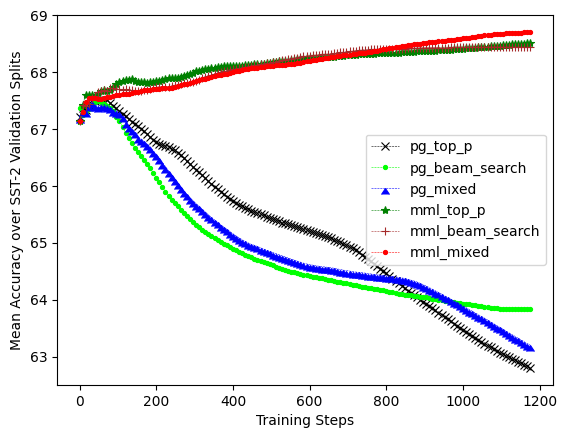

In [73]:
# comparison of tech decoding techniques.
fig = plt.figure()

experiments_to_see = [
    "top_p",
    "beam_search",
    "mixed",
]

local_colors = ["black", "lime", "blue", "green", "brown", "red", "pink"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--"]
markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]

for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["pg_basic_on_policy", "pg_basic_off_policy", "pg_zscore_on_policy", "pg_zscore_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(
        experiment_steps["pg_zscore_on_policy_beam_search"],
        means / 4.0,
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label="pg_" + exp,
        linestyle=linestyles[idx],
        markeredgewidth=0.8,
    )

for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["mml_basic_on_policy", "mml_basic_off_policy", "mml_zscore_on_policy", "mml_zscore_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(
        experiment_steps["mml_basic_on_policy_beam_search"],
        means / 4.0,
        color=local_colors[idx + 3],
        marker=markers[idx + 3],
        linewidth=0.4,
        label="mml_" + exp,
        linestyle=linestyles[idx + 3],
        markeredgewidth=0.8,
    )
plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("decoding_methods_in_pg.svg", format="svg", dpi=1200)

pg_basic_on_policy_mixed 52.2
pg_basic_on_policy_top_p 53.06
pg_basic_on_policy_beam_search 51.89
pg_zscore_on_policy_mixed 65.85
pg_zscore_on_policy_top_p 63.19
pg_zscore_on_policy_beam_search 68.68
pg_basic_off_policy_mixed 67.48
pg_basic_off_policy_top_p 67.45
pg_basic_off_policy_beam_search 67.34
pg_zscore_off_policy_mixed 67.26
pg_zscore_off_policy_top_p 67.5
pg_zscore_off_policy_beam_search 67.4


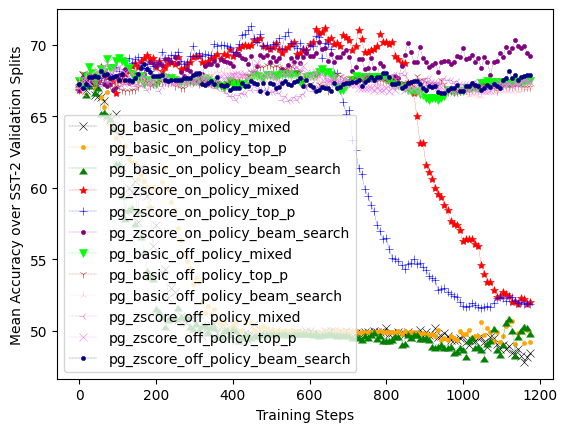

In [98]:
# which combination is good for pg.

fig = plt.figure()

experiments_to_see = [
    "pg_basic_on_policy_mixed",
    "pg_basic_on_policy_top_p",
    "pg_basic_on_policy_beam_search",
    "pg_zscore_on_policy_mixed",
    "pg_zscore_on_policy_top_p",
    "pg_zscore_on_policy_beam_search",
    "pg_basic_off_policy_mixed",
    "pg_basic_off_policy_top_p",
    "pg_basic_off_policy_beam_search",
    "pg_zscore_off_policy_mixed",
    "pg_zscore_off_policy_top_p",
    "pg_zscore_off_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    print(exp, round(np.mean(experiment_means[exp]), 2))
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("pg_comparisons.svg", format="svg", dpi=1200)

mml_basic_on_policy_mixed 68.63
mml_basic_on_policy_top_p 68.52
mml_basic_on_policy_beam_search 67.51
mml_zscore_on_policy_mixed 69.15
mml_zscore_on_policy_top_p 69.14
mml_zscore_on_policy_beam_search 68.95
mml_basic_off_policy_mixed 68.45
mml_basic_off_policy_top_p 68.06
mml_basic_off_policy_beam_search 68.68
mml_zscore_off_policy_mixed 68.6
mml_zscore_off_policy_top_p 68.33
mml_zscore_off_policy_beam_search 68.62


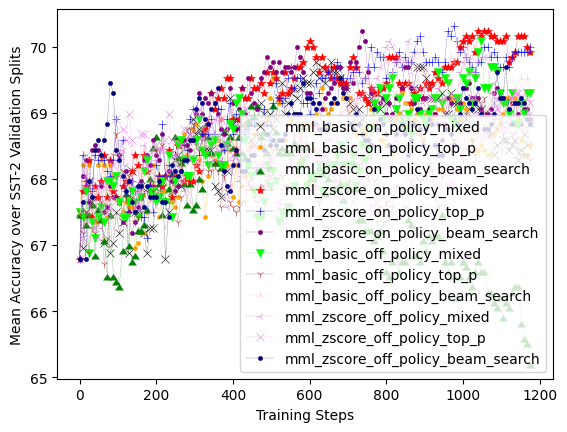

In [99]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "mml_basic_on_policy_mixed",
    "mml_basic_on_policy_top_p",
    "mml_basic_on_policy_beam_search",
    "mml_zscore_on_policy_mixed",
    "mml_zscore_on_policy_top_p",
    "mml_zscore_on_policy_beam_search",
    "mml_basic_off_policy_mixed",
    "mml_basic_off_policy_top_p",
    "mml_basic_off_policy_beam_search",
    "mml_zscore_off_policy_mixed",
    "mml_zscore_off_policy_top_p",
    "mml_zscore_off_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    print(exp, round(np.mean(experiment_means[exp]), 2))
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("mml_comparisons.svg", format="svg", dpi=1200)

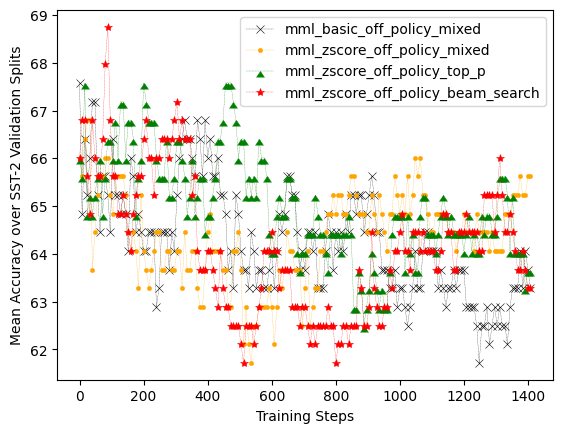

In [37]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_on_policy_top_p",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_on_policy_top_p",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    "mml_basic_off_policy_mixed",
    "mml_zscore_off_policy_mixed",
    # "mml_basic_on_policy_top_p",
    "mml_zscore_off_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    "mml_zscore_off_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

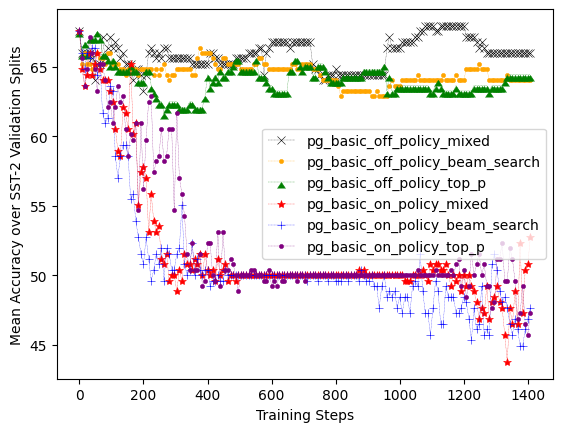

In [38]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    # "mml_basic_off_policy_mixed",
    # "mml_basic_off_policy_beam_search",
    # "mml_basic_off_policy_top_p",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_on_policy_beam_search",
    # "mml_basic_on_policy_top_p",
    "pg_basic_off_policy_mixed",
    "pg_basic_off_policy_beam_search",
    "pg_basic_off_policy_top_p",
    "pg_basic_on_policy_mixed",
    "pg_basic_on_policy_beam_search",
    "pg_basic_on_policy_top_p",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_zscore_on_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

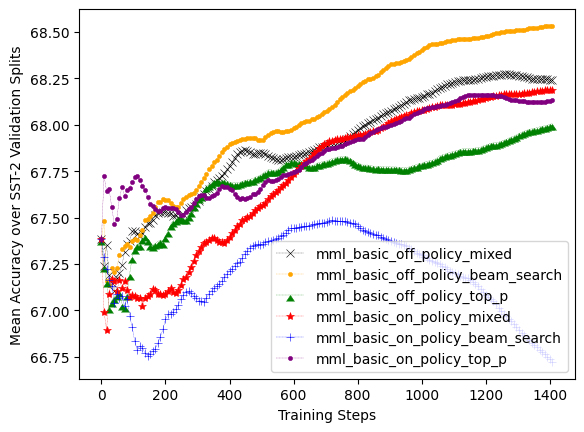

In [16]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_mixed",
    "mml_basic_off_policy_beam_search",
    "mml_basic_off_policy_top_p",
    "mml_basic_on_policy_mixed",
    "mml_basic_on_policy_beam_search",
    "mml_basic_on_policy_top_p",
    # "pg_basic_off_policy_beam_search",
    # "pg_zscore_off_policy_mixed",
    # "pg_zscore_off_policy_beam_search",
    # "pg_zscore_off_policy_top_p",
    # "pg_zscore_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
    # "pg_zscore_on_policy_top_p",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_zscore_on_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

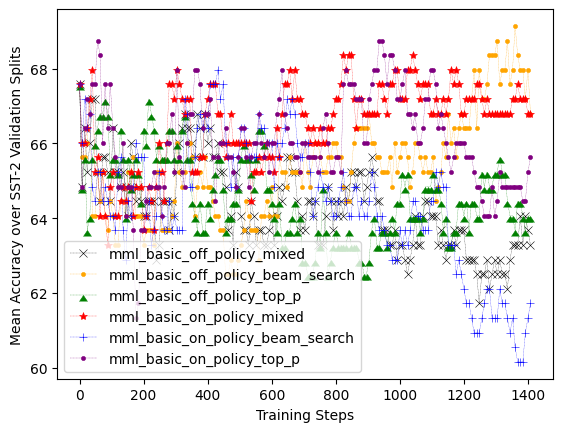

In [28]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_mixed",
    "mml_basic_off_policy_beam_search",
    "mml_basic_off_policy_top_p",
    "mml_basic_on_policy_mixed",
    "mml_basic_on_policy_beam_search",
    "mml_basic_on_policy_top_p",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_on_policy_top_p",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_zscore_on_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

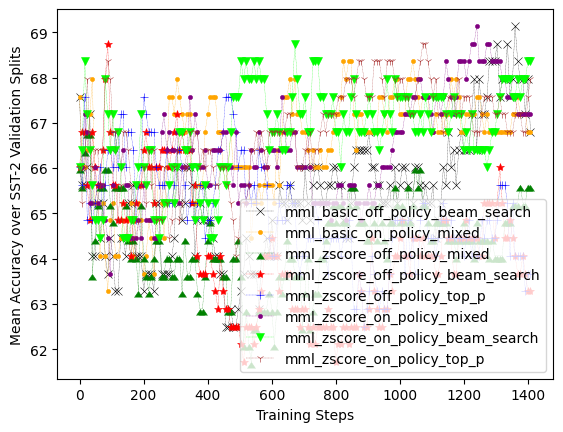

In [30]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    # "mml_basic_off_policy_mixed",
    # "mml_basic_off_policy_beam_search",
    # "mml_basic_off_policy_top_p",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_on_policy_beam_search",
    # "mml_basic_on_policy_top_p",
    "mml_basic_off_policy_beam_search",
    "mml_basic_on_policy_mixed",
    "mml_zscore_off_policy_mixed",
    "mml_zscore_off_policy_beam_search",
    "mml_zscore_off_policy_top_p",
    "mml_zscore_on_policy_mixed",
    "mml_zscore_on_policy_beam_search",
    "mml_zscore_on_policy_top_p",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_zscore_on_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

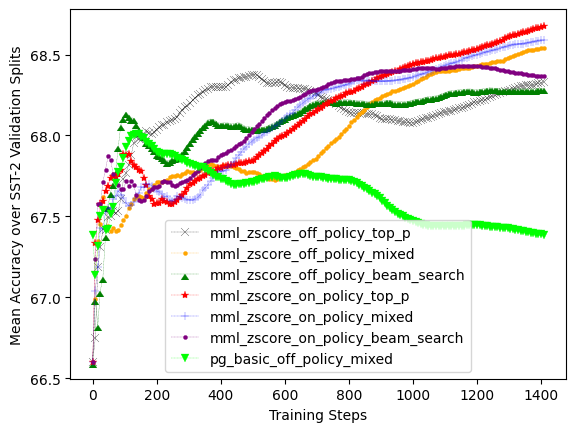

In [19]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    # "mml_basic_off_policy_mixed",
    # "mml_basic_off_policy_beam_search",
    # "mml_basic_off_policy_top_p",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_on_policy_beam_search",
    # "mml_basic_on_policy_top_p",
    # "pg_zscore_off_policy_mixed",
    # "pg_zscore_off_policy_beam_search",
    # "pg_zscore_off_policy_top_p",
    # "pg_zscore_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
    # "pg_zscore_on_policy_top_p",
    "mml_zscore_off_policy_top_p",
    "mml_zscore_off_policy_mixed",
    "mml_zscore_off_policy_beam_search",
    "mml_zscore_on_policy_top_p",
    "mml_zscore_on_policy_mixed",
    "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_zscore_on_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    "pg_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.2,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

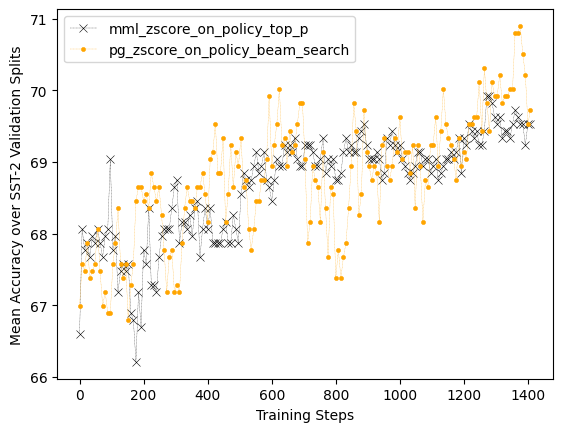

In [26]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    # "mml_basic_off_policy_mixed",
    # "mml_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_basic_off_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_basic_off_policy_beam_search",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_off_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    "mml_zscore_on_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_beam_search",
    # "pg_zscore_on_policy_mixed",
    # "pg_zscore_off_policy_mixed",
    # "pg_zscore_on_policy_top_p",
    # "pg_zscore_off_policy_top_p",
    "pg_zscore_on_policy_beam_search",
    # "pg_zscore_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

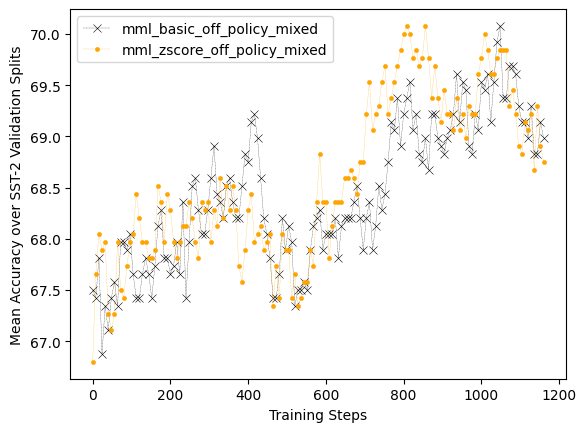

In [209]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_mixed",
    "mml_zscore_off_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_basic_off_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_basic_off_policy_beam_search",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_off_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    "mml_zscore_on_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)

ValueError: x and y must have same first dimension, but have shapes (5, 147) and (100,)

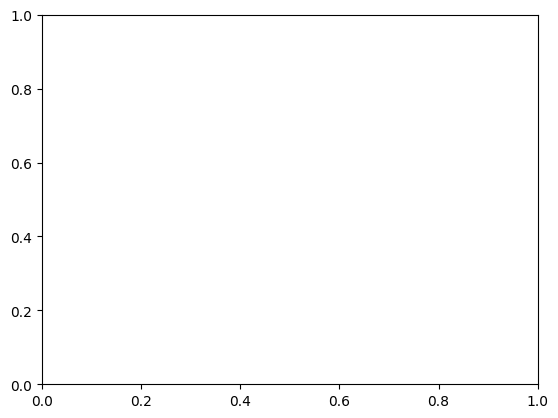

In [221]:
# which combination is good for mml.

fig = plt.figure()

experiments_to_see = [
    "pg_basic_off_policy_mixed",
    "pg_zscore_off_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_basic_off_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_basic_off_policy_beam_search",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_off_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_basic_on_policy_top_p",
    # "mml_zscore_on_policy_top_p",
    # "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_beam_search",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "mml_basic_on_policy_mixed",
    # "mml_basic_off_policy_mixed",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_zscore_on_policy_beam_search",
]
local_colors = [
    "black",
    "orange",
    "green",
    "red",
    "blue",
    "purple",
    "lime",
    "brown",
    "pink",
    "orchid",
    "violet",
    "navy",
]
linestyles = [
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
    "--",
]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3", "x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.2,
        label=exp,
        markeredgewidth=0.4,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("basic_rewards.svg", format="svg", dpi=1200)